In [1]:
# load essential libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook

In [2]:
# load wind data
url = 'https://raw.githubusercontent.com/yangsbin/Meteo_data_analysis/master/data/wind_data.txt'
wind_data = pd.read_csv(url, sep = r'\s+', 
                        header = None, names = ['Year','Month','Day','Hour', 'WD','WS'])
wind_data.WS = wind_data.WS/10.0

In [3]:
# have a short view of the data
wind_data.head()

,Year,Month,Day,Hour,WD,WS
0,2012,1,1,0,209,1.4
1,2012,1,1,1,26,1.5
2,2012,1,1,2,7,3.2
3,2012,1,1,3,301,2.3
4,2012,1,1,4,256,2.4


In [4]:
# how to deal with the date (Year-Month-Day) and time (Hour)
from datetime import datetime

datetimes = []
year_v = wind_data['Year'].values
month_v = wind_data['Month'].values
day_v = wind_data['Day'].values
hour_v = wind_data['Hour'].values

for i in range(0, len(year_v)):
    datetimes.append(datetime(year_v[i], month_v[i], day_v[i], hour_v[i]))

#wind_data['Datetime'] = pd.Series(datetimes)
wind_data.index = pd.Series(datetimes)
wind_data.index.name = 'Datetime'

In [5]:
# have a short view of the data again
wind_data.head()

,Year,Month,Day,Hour,WD,WS
Datetime,,,,,,
2012-01-01 00:00:00,2012,1,1,0,209,1.4
2012-01-01 01:00:00,2012,1,1,1,26,1.5
2012-01-01 02:00:00,2012,1,1,2,7,3.2
2012-01-01 03:00:00,2012,1,1,3,301,2.3
2012-01-01 04:00:00,2012,1,1,4,256,2.4


In [6]:
# statistical description by groups

In [7]:
wind_data[['Year','Month','WD', 'WS']].groupby(['Year', 'Month']).describe().head()

WD                                                              \
            count        mean          std  min   25%    50%     75%      max   
Year Month                                                                      
2012 1      744.0  111.358871   103.762691  2.0  24.0   82.5  183.25    359.0   
     2      696.0  121.943966   105.146016  2.0  26.0   94.0  189.00    359.0   
     3      744.0  135.930108    99.242965  2.0  46.0  127.0  198.00    359.0   
     4      720.0  753.416667  4344.856938  4.0  96.0  192.0  215.00  32766.0   
     5      744.0  160.475806    89.387504  2.0  91.0  178.0  211.00    359.0   

               WS                                                       
            count       mean         std  min  25%  50%    75%     max  
Year Month                                                              
2012 1      744.0   3.315323    1.316775  0.8  2.4  3.1  4.100     8.7  
     2      696.0   3.534052    1.406727  1.0  2.5  3.4  4.325     9.9  
     3      744.0   3.610618    1.481199  0.7  2.5  3.4  4.400    10.4  
     4      720.0  63.524028  436.003672  0.0  3.1  4.0  5.425  3276.6  
     5      744.0   3.577016    1.389393  0.8  2.6  3.5  4.400    10.1

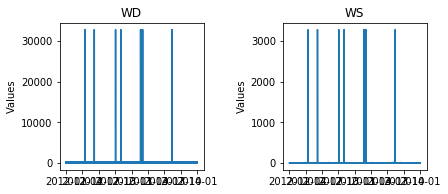

In [8]:
# plot values to check if there are outliers
fg = plt.figure()
plt.subplot(121)
plt.plot(wind_data.WD)
plt.ylabel('Values')
plt.title('WD')

plt.subplot(122)
plt.plot(wind_data.WS)
plt.ylabel('Values')
plt.title('WS')

# adjust the layout of subplots
plt.subplots_adjust(top=0.92, bottom=0.41, left=0.10, right=0.95, hspace=0.25, wspace=0.55)


In [9]:
# remove outliers
# 1) WD > 360 are outliers
# 2) WS > 10000 are outliers
outlier_index = np.logical_or(wind_data['WD'] > 360, wind_data['WS'] > 1000)
wind_data = wind_data.loc[~outlier_index, :]
print("{0} rows of data were removed".format(len(outlier_index)) )

17544 rows of data were removed


In [10]:
wind_data[['Year','Month','WD', 'WS']].groupby(['Year', 'Month']).describe().head()

WD                                                           \
            count        mean         std  min   25%    50%     75%    max   
Year Month                                                                   
2012 1      744.0  111.358871  103.762691  2.0  24.0   82.5  183.25  359.0   
     2      696.0  121.943966  105.146016  2.0  26.0   94.0  189.00  359.0   
     3      744.0  135.930108   99.242965  2.0  46.0  127.0  198.00  359.0   
     4      707.0  164.783593   89.743732  4.0  95.0  189.0  214.00  359.0   
     5      744.0  160.475806   89.387504  2.0  91.0  178.0  211.00  359.0   

               WS                                                  
            count      mean       std  min  25%  50%    75%   max  
Year Month                                                         
2012 1      744.0  3.315323  1.316775  0.8  2.4  3.1  4.100   8.7  
     2      696.0  3.534052  1.406727  1.0  2.5  3.4  4.325   9.9  
     3      744.0  3.610618  1.481199  0.7  2.5  3.4  4.400  10.4  
     4      707.0  4.443423  2.190107  0.0  3.0  4.0  5.400  16.5  
     5      744.0  3.577016  1.389393  0.8  2.6  3.5  4.400  10.1

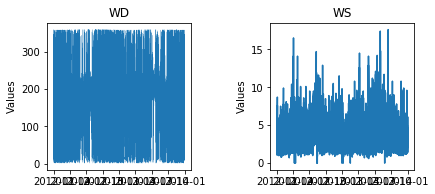

In [11]:
# plot values to check if there are outliers
fg = plt.figure()

plt.subplot(121)
plt.plot(wind_data['WD'], linewidth=0.2)
plt.ylabel('Values')
plt.title('WD')

plt.subplot(122)
plt.plot(wind_data['WS'])
plt.ylabel('Values')
plt.title('WS')

plt.subplots_adjust(top=0.92, bottom=0.41, left=0.10, right=0.95, hspace=0.25, wspace=0.55)

In [12]:
# If I want to see wind direction and wind speed statistics of a specific year
# for example, the data in 2012
wind_2012 = wind_data.loc[wind_data['Year']==2012, ['Month','Day','Hour', 'WD','WS']]

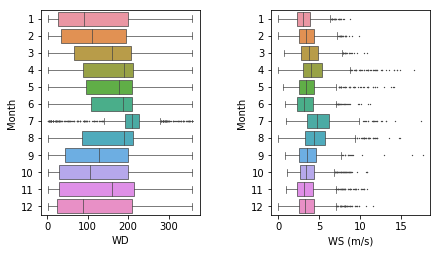

In [13]:
# plot boxplots of wind direction and wind speed in different months
fg = plt.figure()
plt.subplot(121)
wd_2012 = wind_data[['Month','WD']]
sns.boxplot(x = 'WD', y = 'Month', data = wd_2012, orient = 'h', fliersize=0.5, linewidth = 0.7)

plt.subplot(122)
ws_2012 = wind_data[['Month','WS']]
ax = sns.boxplot(x = 'WS', y = 'Month', data = ws_2012, orient = 'h', fliersize=0.5, linewidth = 0.7)
ax.set_xlabel('WS (m/s)')

plt.subplots_adjust(top=0.92, bottom=0.21, left=0.10, right=1.0, hspace=0.25, wspace=0.45)

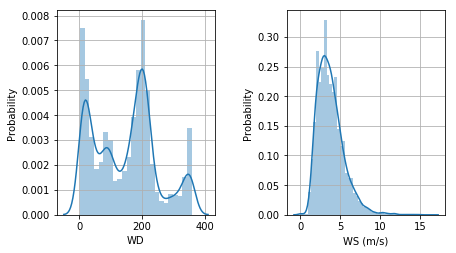

In [14]:
# distribution plot of wind direction and wind speed
fg = plt.figure()
plt.subplot(121)
ax = sns.distplot(wind_2012.WD)
plt.ylabel('Probability')
plt.grid()

plt.subplot(122)
ax = sns.distplot(wind_2012.WS)
plt.ylabel('Probability')
plt.xlabel('WS (m/s)')
plt.grid()

plt.subplots_adjust(top=0.92, bottom=0.21, left=0.10, right=1.0, hspace=0.25, wspace=0.45)

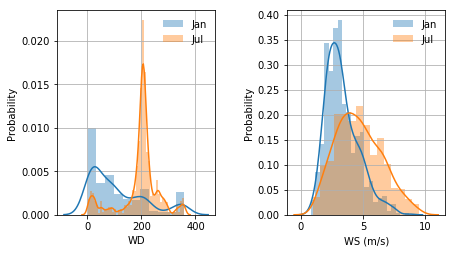

In [15]:
# Check the distribution of the wind direction in January and the wind direction in July
fg = plt.figure()

wd_Jan = wind_2012.loc[wind_2012['Month'] == 1, ['Month','WD']]
wd_Jul = wind_2012.loc[wind_2012['Month'] == 7, ['Month','WD']]
plt.subplot(121)
sns.distplot(wd_Jan.WD)
sns.distplot(wd_Jul.WD)
plt.ylabel('Probability')
plt.grid()
plt.legend(['Jan','Jul'], frameon = False)

ws_Jan = wind_2012.loc[wind_2012['Month'] == 1, ['Month','WS']]
ws_Jul = wind_2012.loc[wind_2012['Month'] == 7, ['Month','WS']]
plt.subplot(122)
sns.distplot(ws_Jan.WS)
sns.distplot(ws_Jul.WS)
plt.ylabel('Probability')
plt.xlabel('WS (m/s)')
plt.grid()
plt.legend(['Jan','Jul'], frameon = False)

plt.subplots_adjust(top=0.92, bottom=0.21, left=0.10, right=1.0, hspace=0.25, wspace=0.45)

In [16]:
# plot wind rose figure
from windrose import WindroseAxes
import matplotlib.cm as cm

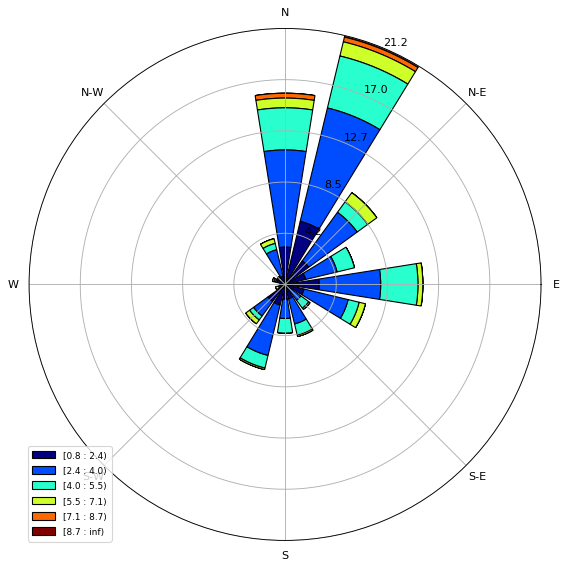

In [17]:
# please refer to the manual of the windrose library
# plot wind rose in stacked bar style
ax = WindroseAxes.from_ax()
ax.bar(wd_Jan.WD, ws_Jan.WS, normed=True, opening=0.8, edgecolor='black')
ax.set_legend()

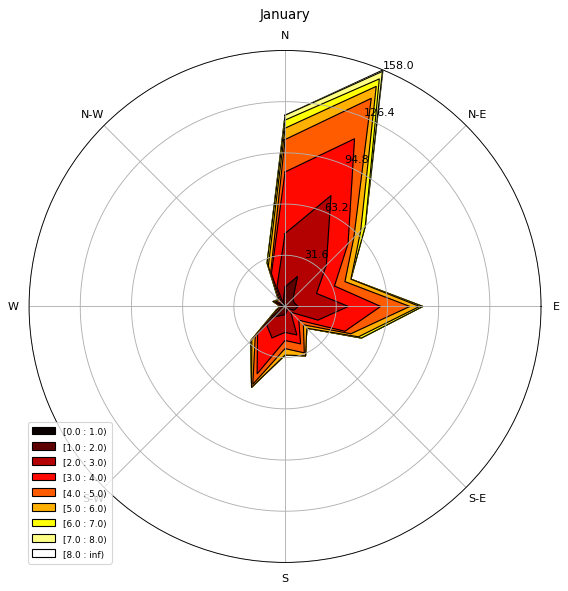

In [18]:
# plot wind rose in another style
ax = WindroseAxes.from_ax()
ax.contourf(wd_Jan.WD, ws_Jan.WS, bins=np.arange(0,9,1), cmap=cm.hot)
ax.contour(wd_Jan.WD, ws_Jan.WS, bins=np.arange(0,9,1), colors = 'black', lw=1)
ax.set_title('January')
ax.set_legend()

Text(0.5, 1.05, 'July')

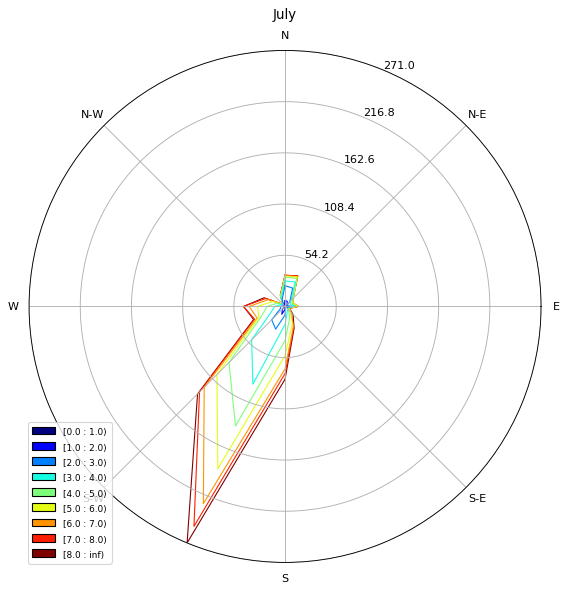

In [19]:
# plot windrose with plot_windrose method
from windrose import plot_windrose
df = pd.DataFrame({'speed':ws_Jul.WS.values, 'direction':wd_Jul.WD.values})
ax = plot_windrose(df, kind = 'contour', bins=np.arange(0, 9, 1), cmap=cm.jet, lw=1)
ax.set_title('July')

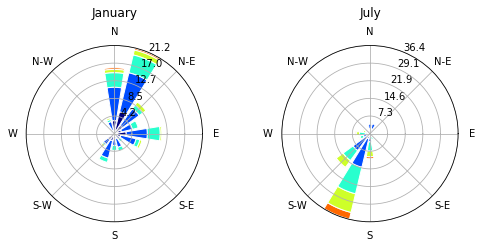

In [20]:
# plot windrose subplots
fg = plt.figure()
ax1 = fg.add_subplot(1,2,1, projection='windrose')
ax1.bar(wd_Jan.WD, ws_Jan.WS, normed=True, opening=0.8, edgecolor='white')
ax1.set_title('January', pad = 20)

ax2 = fg.add_subplot(1,2,2, projection='windrose')
ax2.bar(wd_Jul.WD, ws_Jul.WS, normed=True, opening=0.8, edgecolor='white')
ax2.set_title('July', pad = 20)

plt.subplots_adjust(top=1, bottom=0, left=0.0, right=1.0, hspace=0.25, wspace=0.45)

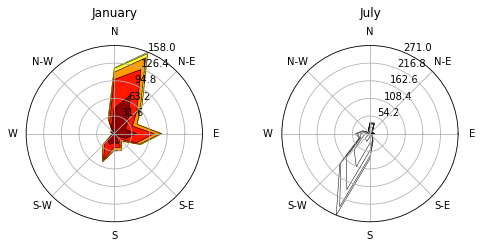

In [21]:
# plot windrose subplots
fg = plt.figure()
ax_Jan = fg.add_subplot(1,2,1, projection='windrose')
ax_Jan.contourf(wd_Jan.WD, ws_Jan.WS, bins = np.arange(0,9,1.5), cmap = cm.hot)
ax_Jan.contour(wd_Jan.WD, ws_Jan.WS, bins = np.arange(0,9,1.5), colors = 'black', lw = 0.5)
ax_Jan.set_title('January', pad = 20)

ax_Jul = fg.add_subplot(1,2,2, projection = 'windrose')
ax_Jul.contour(wd_Jul.WD, ws_Jul.WS, bins = np.arange(0,9,1.5), colors = 'black', lw = 0.5)
ax_Jul.set_title('July', pad = 20)

plt.subplots_adjust(top=1, bottom=0, left=0.0, right=1.0, hspace=0.25, wspace=0.45)

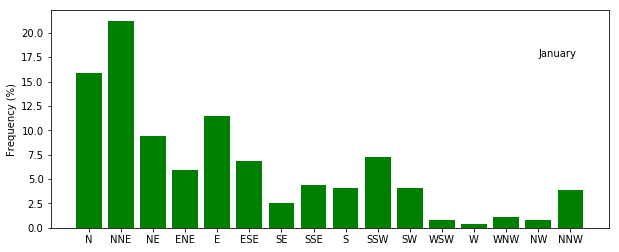

In [22]:
# bar plot of frequencies
ax_Jan.bar(wd_Jan.WD, ws_Jan.WS, normed=True, nsector=16)
table_Jan = ax_Jan._info['table']
wd_freq_Jan = np.sum(table_Jan, axis=0)

direction_Jan = ax_Jan._info['dir']
plt.figure(figsize=(10,4))
plt.bar(np.arange(16), wd_freq_Jan, align='center', facecolor = 'green')
plt.xticks(np.arange(16))
xlabels = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
_ = plt.gca().set_xticklabels(xlabels)
_ = plt.text(x = 14, y = 17.5, s = 'January')
_ = plt.ylabel('Frequency (%)')

(1, 2.6614301902227524, 0, 3.734483068109758)


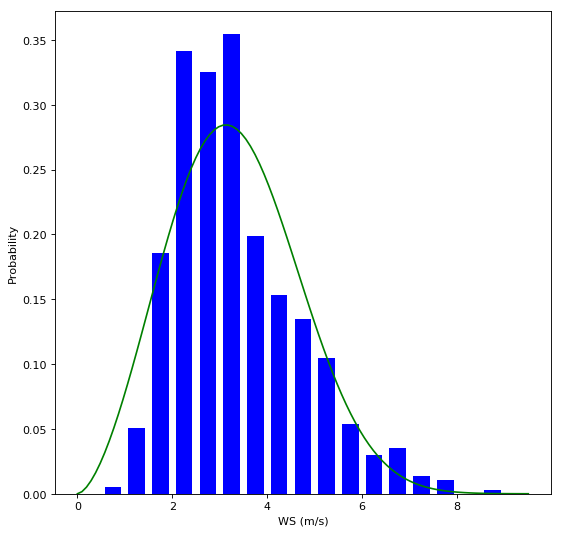

In [23]:
# fit wind speed distribution using Weibull probability distribution
from windrose import WindAxes
ax = WindAxes.from_ax()
bins = np.arange(0, 9+1, 0.5)
bins = bins[1:]
ax, params = ax.pdf(ws_Jan.WS, bins = bins)
ax.set_xlabel('WS (m/s)')
ax.set_ylabel('Probability')

# print parameters of fitted Weibull probability distribution
print(params)

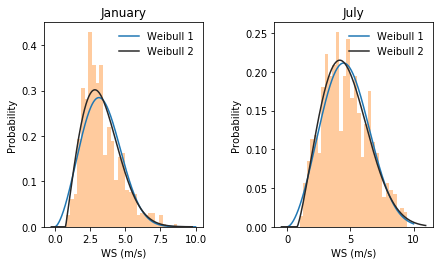

In [24]:
# comparion of wind speed distributions between January and July
from scipy import stats

fg = plt.figure()

plt.subplot(121)
shape, loc, scale = stats.weibull_min.fit(ws_Jan.WS, floc=0)
x = np.arange(0, 10, 0.01)
sns.lineplot(x, stats.weibull_min.pdf(x, c = shape, scale = scale, loc = loc))
sns.distplot(ws_Jan.WS, bins = 30, fit = stats.weibull_min, kde = False, hist = True)
plt.xlabel('WS (m/s)')
plt.ylabel('Probability')
plt.title('January')
plt.legend(['Weibull 1','Weibull 2'], frameon = False)

plt.subplot(122)
shape, loc, scale = stats.weibull_min.fit(ws_Jul.WS, floc=0)
x = np.arange(0, 10, 0.01)
sns.lineplot(x, stats.weibull_min.pdf(x, c = shape, scale = scale, loc = loc))
sns.distplot(ws_Jul.WS, bins = 30, fit = stats.weibull_min, kde = False, hist = True)
plt.xlabel('WS (m/s)')
plt.ylabel('Probability')
plt.title('July')
plt.legend(['Weibull 1','Weibull 2'], frameon = False)

plt.subplots_adjust(top=0.92, bottom=0.21, left=0.10, right=1.0, hspace=0.25, wspace=0.45)

In [25]:
# https://github.com/blaylockbk/Ute_WRF/tree/master/functions
# wind vector decomposition to U and V
def wind_spddir_to_uv(wspd, wdir):
    """
    calculated the u and v wind components from wind speed and direction
    Input:
        wspd: wind speed
        wdir: wind direction
    Output:
        u: u wind component
        v: v wind component
    """    
    
    rad = 4.0*np.arctan(1)/180.
    u = -wspd*np.sin(rad*wdir)
    v = -wspd*np.cos(rad*wdir)

    return u,v


Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


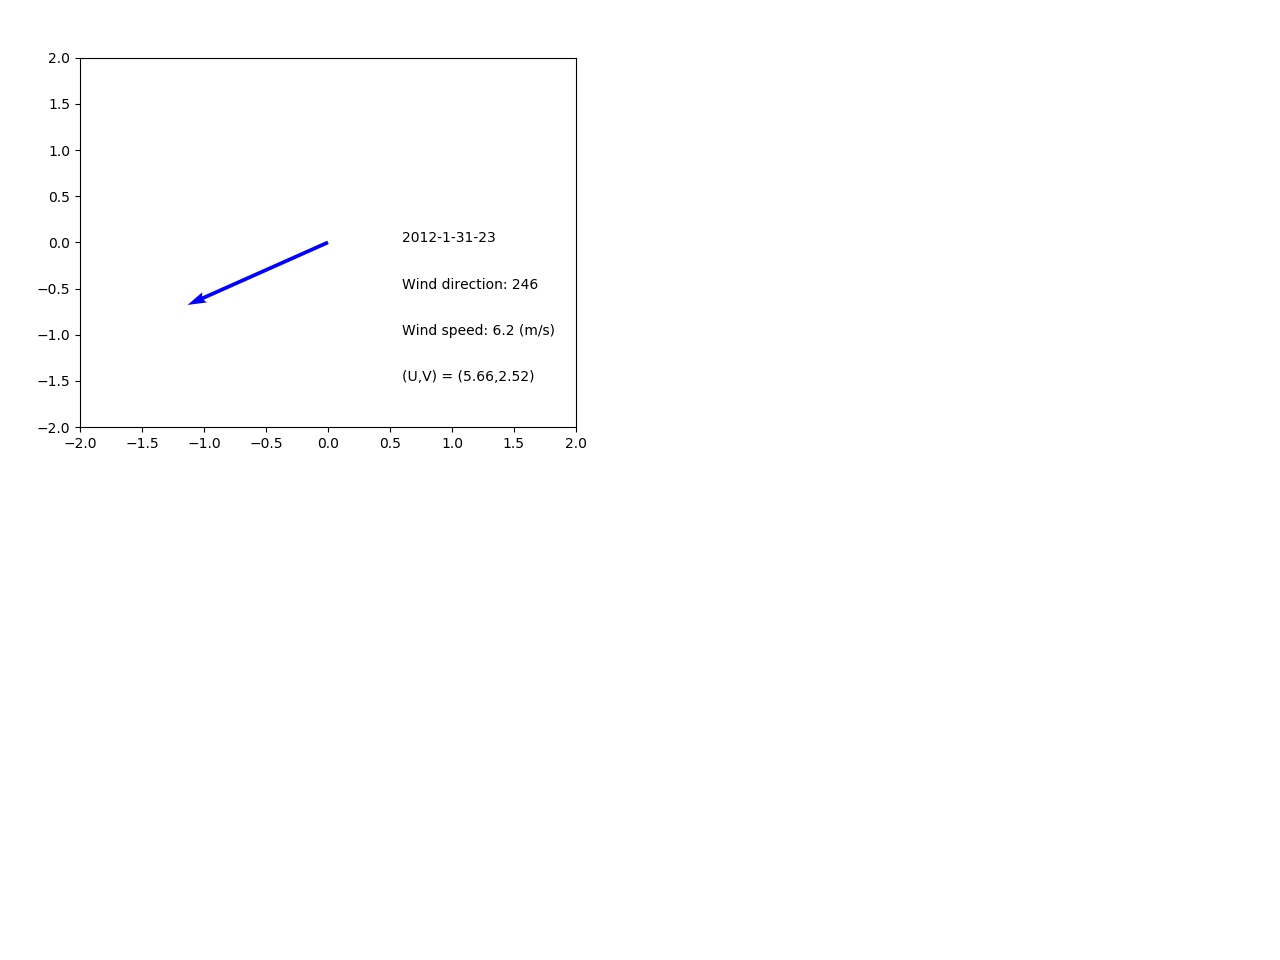

In [26]:
# animation plot of wind vector
%matplotlib 

u1, v1 = wind_spddir_to_uv(ws_Jan.WS, wd_Jan.WD)

plt.ion
fg = plt.figure()
ax = fg.add_subplot(111)

for i in range(0, len(u1)):
    plt.clf()
    plt.quiver(-u1[i], -v1[i], scale=20.0, color = 'blue')
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.text(x = 0.6, y = 0.0, s='{0}-{1}-{2}-{3}'.format(
            ws_Jan.index[i].year, ws_Jan.index[i].month, ws_Jan.index[i].day, 
            ws_Jan.index[i].hour))
    plt.text(x = 0.6, y = -1.5, s='(U,V) = ({0},{1})'.format(round(u1[i],2), round(v1[i],2)))
    plt.text(x = 0.6, y = -0.5, s='Wind direction: {0}'.format(round(wd_Jan.WD[i], 2)))
    plt.text(x = 0.6, y = -1.0, s='Wind speed: {0} (m/s)'.format(round(ws_Jan.WS[i], 2)))
    plt.savefig('{0}.png'.format(i))
    fg.canvas.draw()
    fg.canvas.flush_events()
    



In [27]:
# output animation of wind vector to a gif format picture file
import glob
import imageio

graphs = []
for i in range(0, len(u1)):
    filename = str('{0}.png'.format(i))
    graphs.append(imageio.imread(filename))
output_file = 'Gif_{0}.gif'.format(datetime.today())
imageio.mimsave(output_file, graphs, duration = 0.1, loop = 1)


FileNotFoundError: No such file: '/Users/orbenyang/Documents/Weichat_Publication/0.png'